In [1]:
import pandas as pd
import numpy as np

In [5]:
pwd

'c:\\Users\\SPPL IT\\Desktop\\Study\\Python\\Real-World Data Science Problems'

In [3]:
df=pd.read_csv("Sales_Data\Sales_April_2019.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\463524126.py:1: SyntaxWarning: invalid escape sequence '\S'
  df=pd.read_csv("Sales_Data\Sales_April_2019.csv")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Importing All Datasets from the directory

In [4]:
import glob
import os

In [5]:
directory_path = r"C:\Users\SPPL IT\Desktop\Study\Python\Real-World Data Science Problems\Sales_Data"

# Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, "*.csv"))

# Initialize an empty list to hold the DataFrames
dfs = []

# Loop through the list of CSV files and read each one into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all the DataFrames in the list into a single DataFrame
all_data = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(all_data.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [23]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Cleaning The Dataset

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [167]:
all_data.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [24]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
## Drop NaN !
dropped_NA=all_data.dropna(how="all")  ## if whole row has NaN,then drop
dropped_NA.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
# Removing rows based on a condition

In [12]:
temp_df = dropped_NA[dropped_NA["Order Date"].str[0:2]=="Or"]
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
all_data = dropped_NA[dropped_NA["Order Date"].str[0:2]!="Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
#Change the type of columns (to_numeric, to_datetime, astype)

In [ ]:
#all_data["Quantity Ordered"]=all_data["Quantity Ordered"].astype("int")
#all_data["Price Each"]=all_data["Price Each"].astype("float")

In [14]:
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])

C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\2537120576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])
C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\2537120576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])


In [43]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


# Data Exploration

### 1. What was the best month for sales? How much was earned that month?

In [17]:
## Add A Specific Col For The Months
all_data["Month"] = all_data["Order Date"].str[0:2] ## Will select only first two char of months col
all_data["Month"]= all_data["Month"].astype("int") ##Will convert the newly made col to int
all_data.head()

C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\1724547380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"] = all_data["Order Date"].str[0:2] ## Will select only first two char of months col
C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\1724547380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"]= all_data["Month"].astype("int") ##Will convert the newly made col to int


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


In [18]:
## Add a Sales Col
all_data["Sales"] =  all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head()

C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\137659571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Sales"] =  all_data["Quantity Ordered"]*all_data["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


In [19]:
all_data= all_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Purchase Address', 'Month']]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a City Col [For Task 2]

In [181]:
#all_data["City"]= all_data["Purchase Address"].apply(lambda x:x.split(",")[1])
#all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas,4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston,4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles,4


In [20]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"]=all_data["Purchase Address"].apply(lambda x: get_city(x) + " (" + get_state(x) + ")")

C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\316967807.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["City"]=all_data["Purchase Address"].apply(lambda x: get_city(x) + " (" + get_state(x) + ")")


In [21]:
all_data= all_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Purchase Address',"City", 'Month']]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (TX),4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (MA),4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4


In [62]:
#Month_data=all_data.groupby("Month")

#for Month,all_data in Month_data :
    #print(all_data)
    #print("")
    

      Order ID                   Product  Quantity Ordered  Price Each  \
31957   297150  Lightning Charging Cable                 1       14.95   
32659   297817                    iPhone                 1      700.00   
32660   297817  Lightning Charging Cable                 2       14.95   
32819   297969              Google Phone                 1      600.00   
33200   298344          Wired Headphones                 4       11.99   
...        ...                       ...               ...         ...   
77265   150497              20in Monitor                 1      109.99   
77266   150498          27in FHD Monitor                 1      149.99   
77267   150499           ThinkPad Laptop                 1      999.99   
77268   150500    AAA Batteries (4-pack)                 2        2.99   
77269   150501              Google Phone                 1      600.00   

        Sales      Order Date                      Purchase Address  Month  
31957   14.95  01/01/20 00:38     

In [63]:
#Month_data.sum()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address
Month,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,1822256.73,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne..."


In [17]:
#all_data=all_data.groupby("Month").sum()
#all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City
Month,,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,1822256.73,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",Dallas (TX) New York City (NY) New York City ...
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,2202022.42,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",Portland (ME) San Francisco (CA) New York Cit...
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,2807100.38,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",San Francisco (CA) Portland (OR) San Francisc...
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,3390670.24,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",Dallas (TX) Boston (MA) Los Angeles (CA) Los ...
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,3152606.75,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",Portland (OR) San Francisco (CA) Boston (MA) ...


In [50]:
best_month_for_sale = all_data.groupby("Month")["Sales"].sum().reset_index()
best_month_for_sale

,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


In [45]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (TX),4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (MA),4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4


In [51]:
best_month_for_sale=all_data.groupby("Month").sum()["Sales"]
best_month_for_sale

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [53]:
best_month_for_sale.max()

4613443.34

In [54]:
best_month_for_sale.idxmax()

12

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 

<Axes: xlabel='Month', ylabel='Sales'>

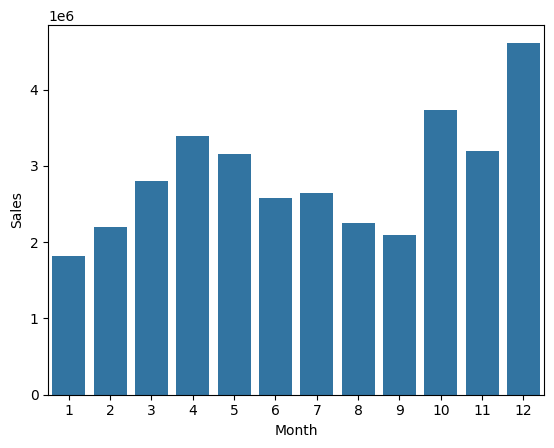

In [64]:
sns.barplot(data=best_month_for_sale,x="Month",y="Sales")

In [58]:
# Reset the index to convert the Series back to a DataFrame
best_month_for_sale = best_month_for_sale.reset_index()

C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_21180\1969430149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_month_for_sale, x="Month", y="Sales",palette="Set2",edgecolor="black");


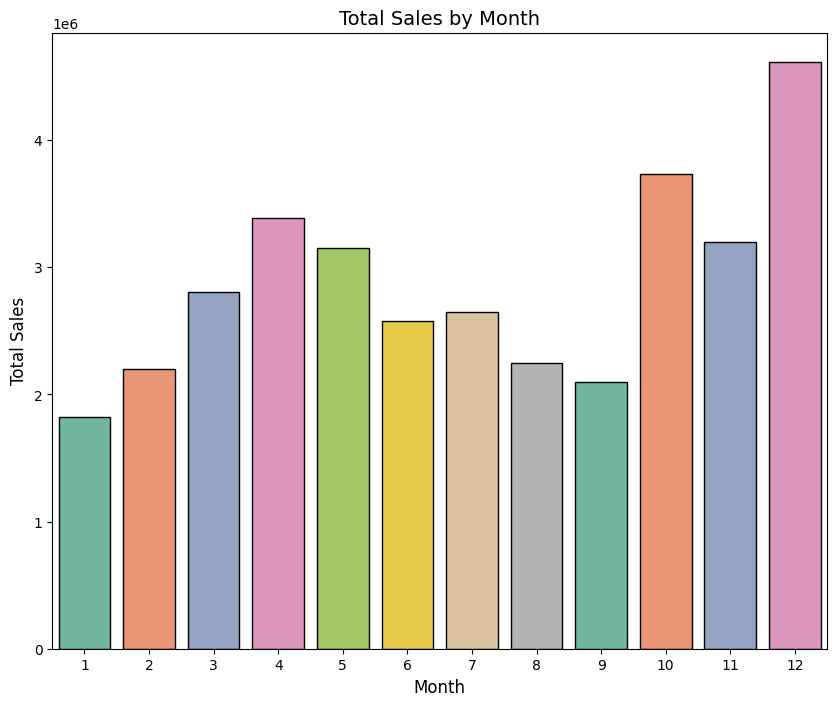

In [59]:
plt.figure(figsize=(10, 8))
sns.barplot(data=best_month_for_sale, x="Month", y="Sales",palette="Set2",edgecolor="black");
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales by Month", fontsize=14)
plt.show();

Resetting the index: In the provided code, best_month_for_sale is initially created as a pandas Series, not a DataFrame. When using Seaborn's barplot() function, it expects the data to be in DataFrame format. By resetting the index, you convert the Series back into a DataFrame, where the index becomes a regular column, and a new default index is created. This step allows you to use the columns as x and y variables in the Seaborn plot.

In [55]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX),4,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA),4,22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4,9


### What city sold the most product?

In [82]:
best_city_for_sale=all_data.groupby("City").sum(numeric_only=True)["Quantity Ordered"]
best_city_for_sale

City
Atlanta (GA)          16602
Austin (TX)           11153
Boston (MA)           22528
Dallas (TX)           16730
Los Angeles (CA)      33289
New York City (NY)    27932
Portland (ME)          2750
Portland (OR)         11303
San Francisco (CA)    50239
Seattle (WA)          16553
Name: Quantity Ordered, dtype: int64

In [83]:
# Reset the index to convert the Series back to a DataFrame
best_city_for_sale = best_city_for_sale.reset_index()

C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\1660567281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_city_for_sale, x="City", y="Quantity Ordered",palette="Set2",edgecolor="black");


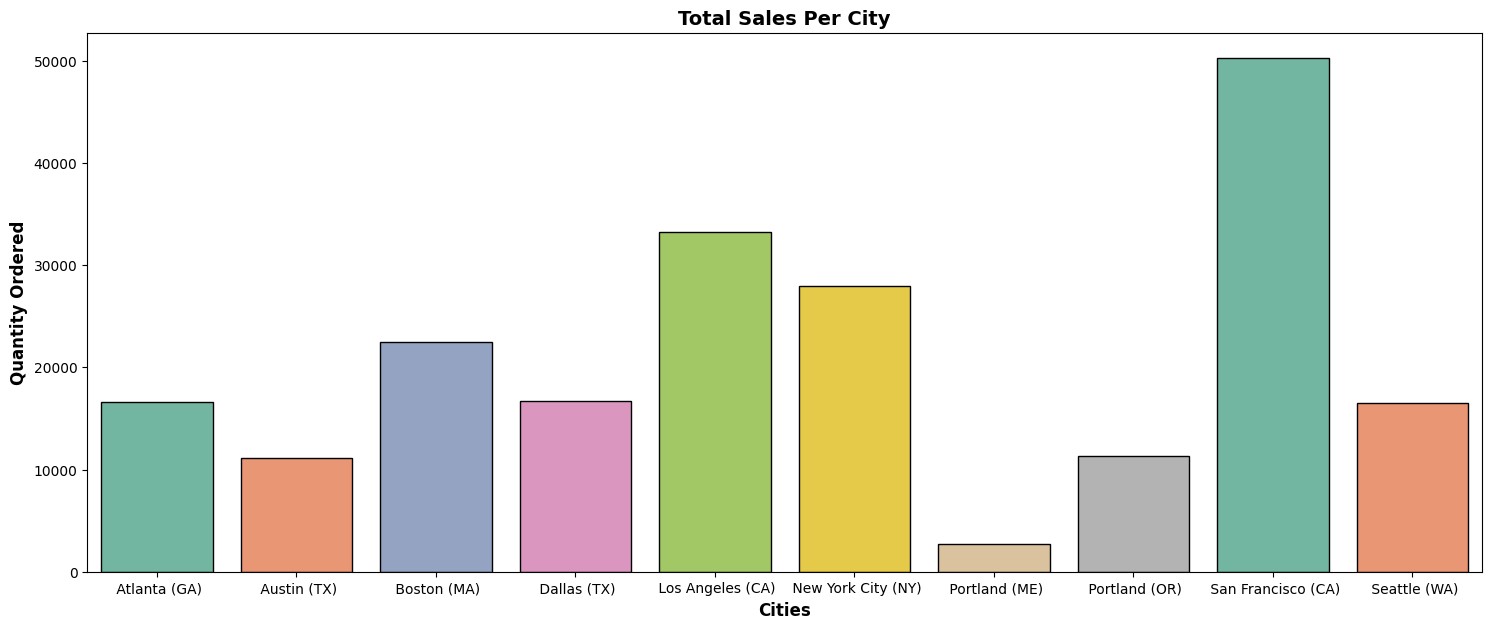

In [84]:
plt.figure(figsize=(18, 7))
sns.barplot(data=best_city_for_sale, x="City", y="Quantity Ordered",palette="Set2",edgecolor="black");
#max_sales = best_city_for_sale["Sales"].max()
plt.xlabel("Cities", fontsize=12,fontweight='bold')
plt.ylabel("Quantity Ordered", fontsize=12,fontweight='bold')
plt.title("Total Sales Per City", fontsize=14,fontweight='bold')
plt.show();

### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [71]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (TX),4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (MA),4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4


In [99]:
##all_data["Order Date"].str[9:]

0         08:46
2         22:30
3         14:38
4         14:38
5         09:27
          ...  
186845    20:56
186846    16:00
186847    07:39
186848    17:30
186849    00:18
Name: Order Date, Length: 185950, dtype: object

### Convrt into Date Time Object

In [41]:
all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])
all_data.head()

C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\4276780259.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX),4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA),4
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4


In [42]:
all_data["Hour"]=all_data["Order Date"].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX),4,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA),4,22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4,9


In [86]:
best_time_for_sale=all_data.groupby("Hour").sum(numeric_only=True)["Quantity Ordered"].reset_index()

best_time_for_sale.head()

,Hour,Quantity Ordered
0,0,4428
1,1,2619
2,2,1398
3,3,928
4,4,937


C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\2195604516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_time_for_sale, x="Hour", y="Quantity Ordered",palette="Set2",edgecolor="black");


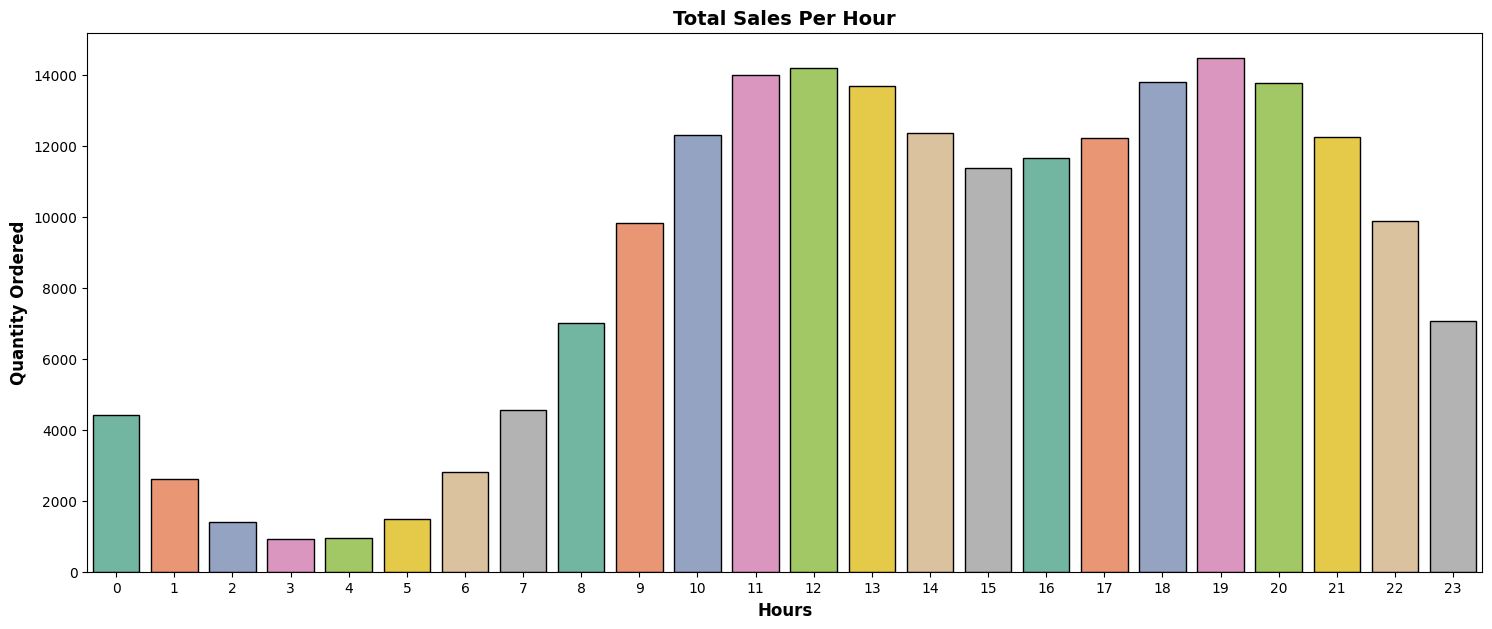

In [85]:
plt.figure(figsize=(18, 7))
sns.barplot(data=best_time_for_sale, x="Hour", y="Quantity Ordered",palette="Set2",edgecolor="black");
#max_sales = best_city_for_sale["Sales"].max()
plt.xlabel("Hours", fontsize=12,fontweight='bold')
plt.ylabel("Quantity Ordered", fontsize=12,fontweight='bold')
plt.title("Total Sales Per Hour", fontsize=14,fontweight='bold')
plt.show();

C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\1371696359.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


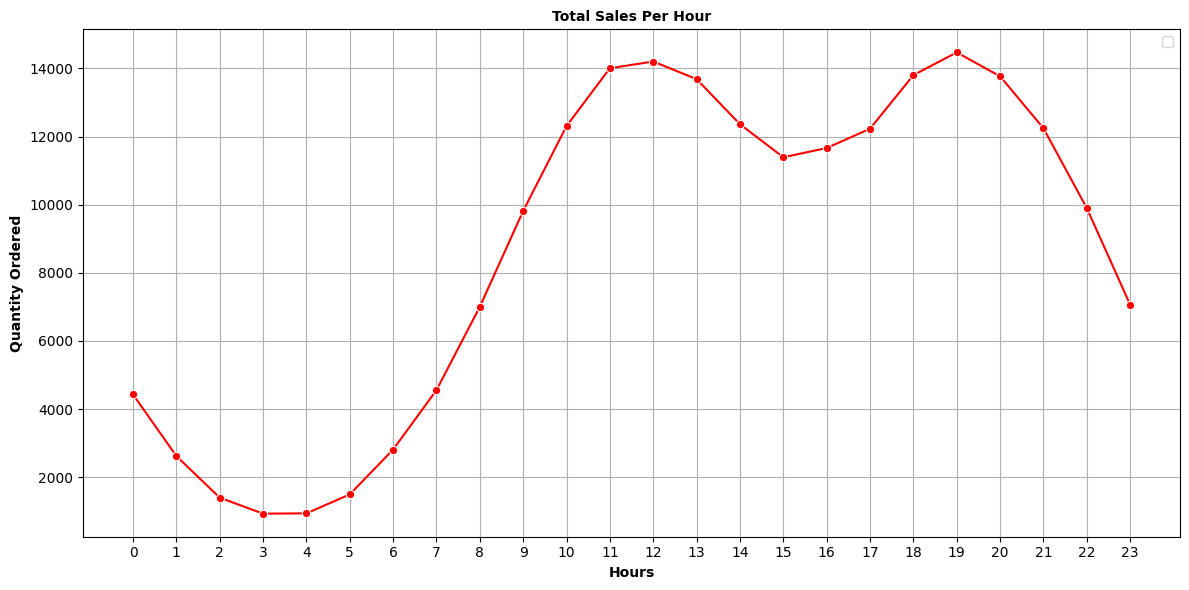

In [87]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=best_time_for_sale, x='Hour', y='Quantity Ordered', marker='o', color='r')
plt.xticks(ticks=best_time_for_sale['Hour'])
#plt.yticks(ticks=best_time_for_sale['Quantity Ordered'])
plt.xlabel("Hours", fontsize=10,fontweight='bold')
plt.ylabel("Quantity Ordered", fontsize=10,fontweight='bold')
plt.title("Total Sales Per Hour", fontsize=10,fontweight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()

C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\3421016388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_time_for_sale, x="Quantity Ordered", y="Hour",edgecolor="black",orient='h', palette='viridis');


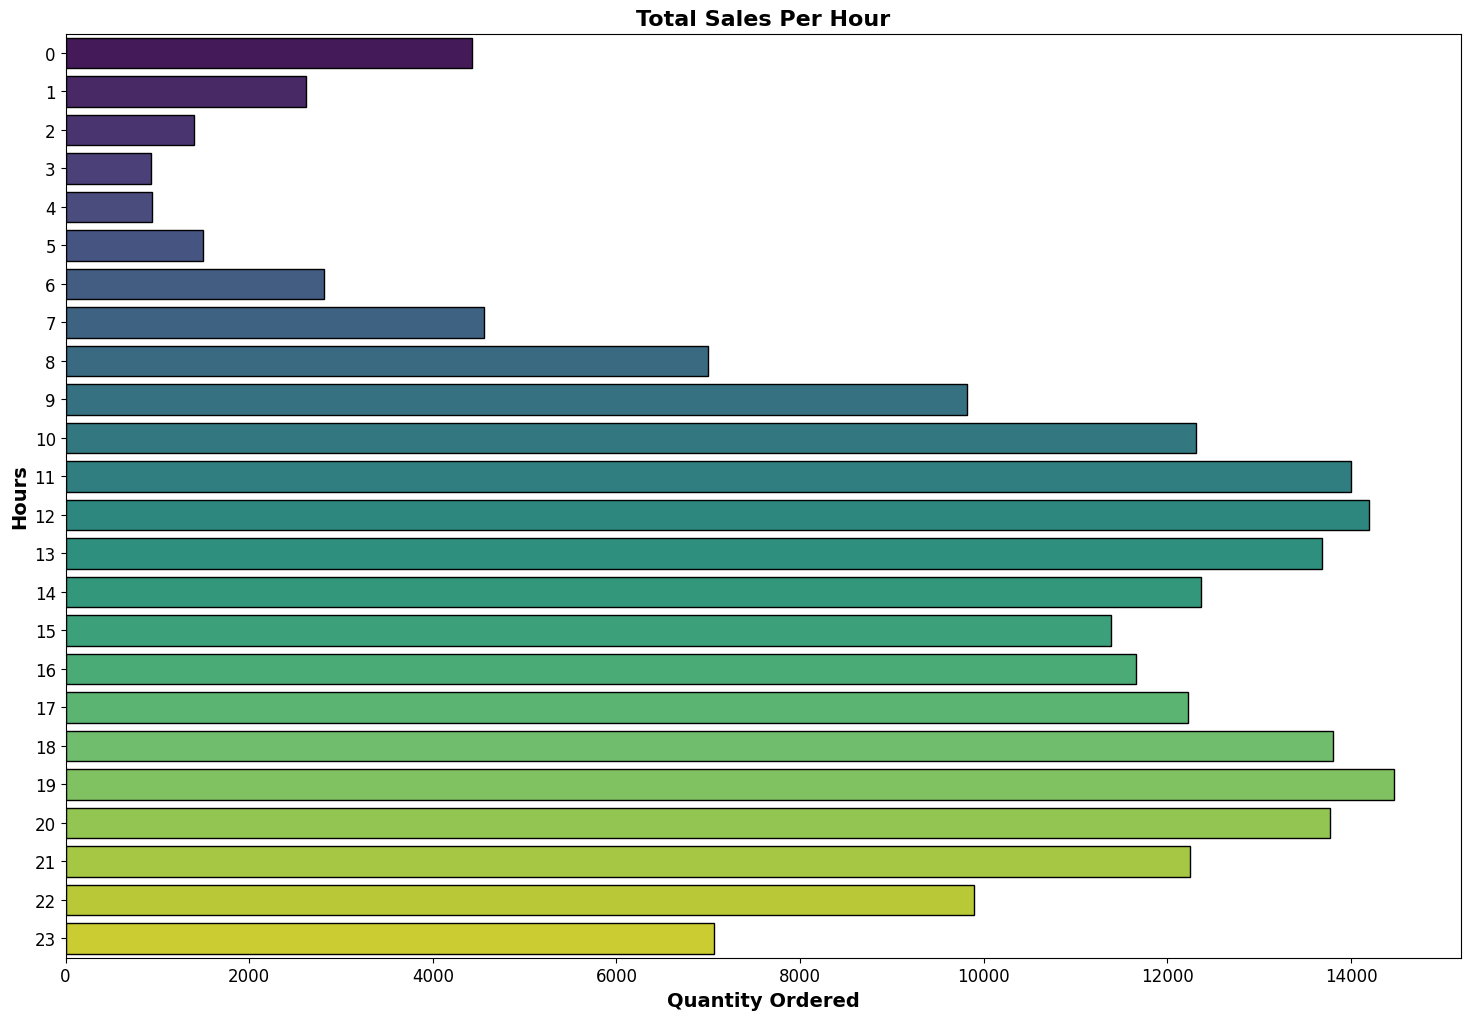

In [88]:
plt.figure(figsize=(18, 12))
sns.barplot(data=best_time_for_sale, x="Quantity Ordered", y="Hour",edgecolor="black",orient='h', palette='viridis');
plt.xlabel("Quantity Ordered", fontsize=14,fontweight='bold')
plt.ylabel("Hours", fontsize=14,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Total Sales Per Hour", fontsize=16,fontweight='bold')

plt.show();

### Which Products Are Most Popular ?


In [47]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX),4,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA),4,22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4,9
6,176562,USB-C Charging Cable,1,11.95,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",San Francisco (CA),4,13
7,176563,Bose SoundSport Headphones,1,99.99,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",Seattle (WA),4,7
8,176564,USB-C Charging Cable,1,11.95,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",Atlanta (GA),4,10
9,176565,Macbook Pro Laptop,1,1700.00,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",San Francisco (CA),4,10
10,176566,Wired Headphones,1,11.99,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",Boston (MA),4,14


In [73]:
best_product_for_sale=all_data.groupby('Product').sum(numeric_only=True)["Quantity Ordered"].reset_index()

sorted_product_data = best_product_for_sale.sort_values(by='Quantity Ordered', ascending=False)

sorted_product_data.head()

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557


C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\768110359.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_product_for_sale, x="Quantity Ordered", y="Product",edgecolor="black", palette='viridis');


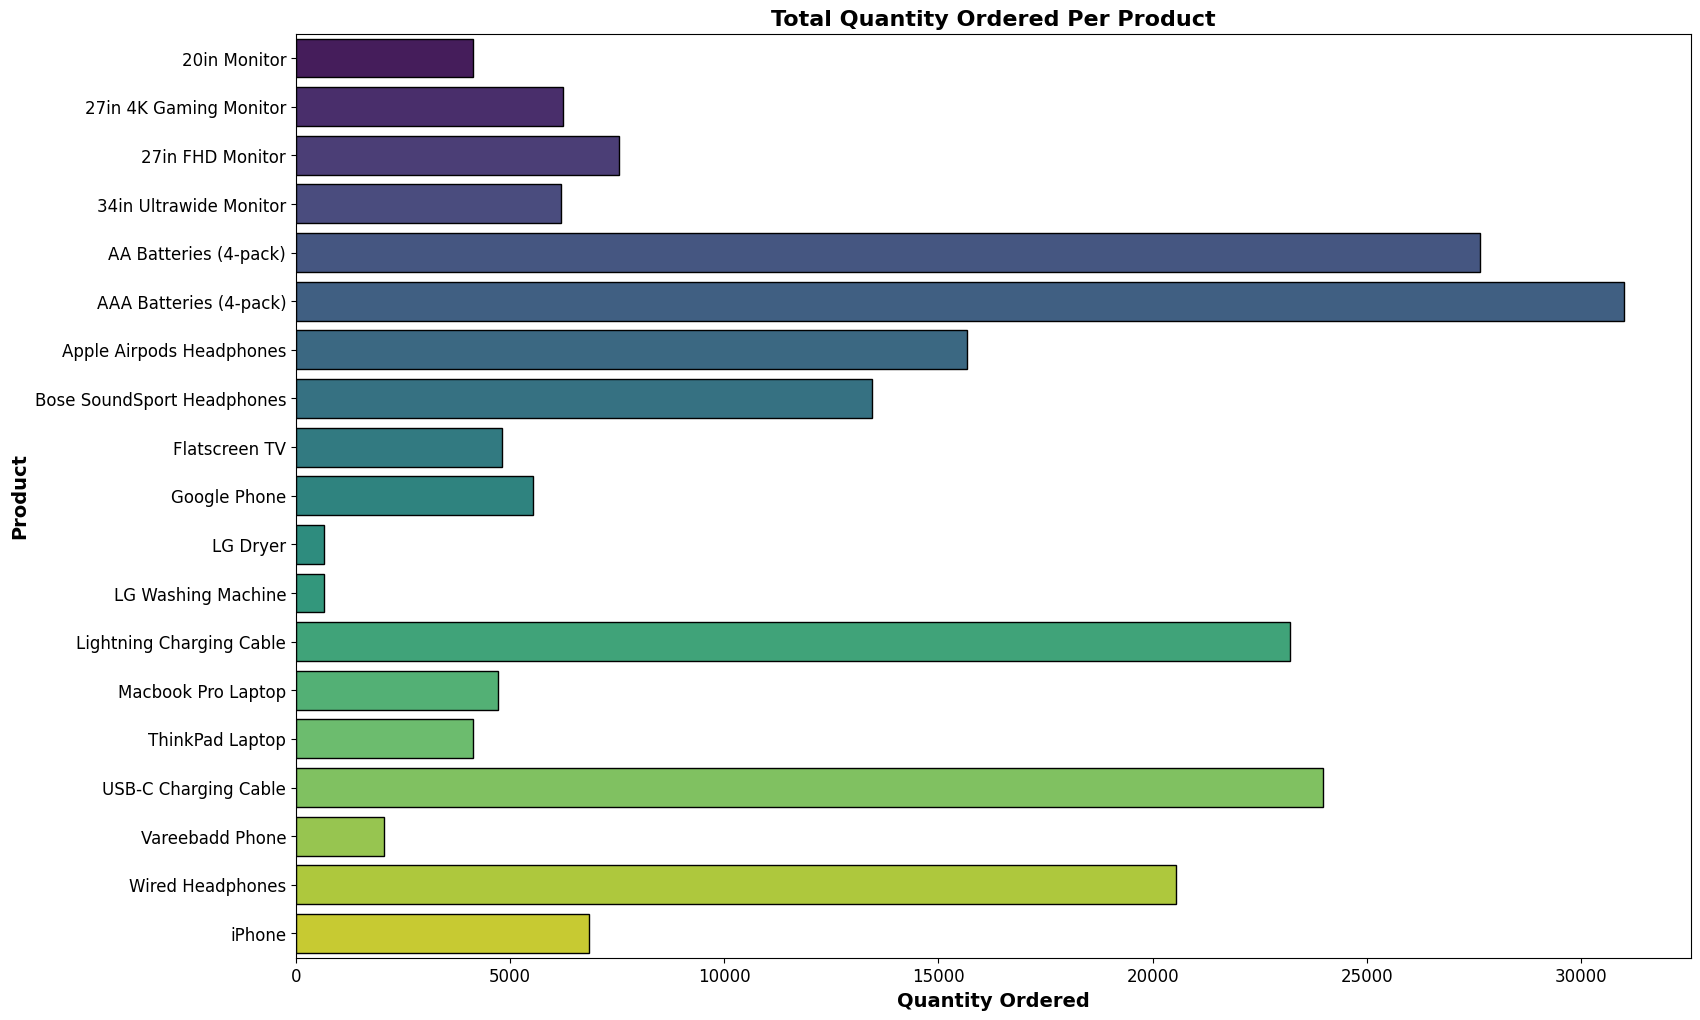

In [74]:
plt.figure(figsize=(18, 12))
sns.barplot(data=best_product_for_sale, x="Quantity Ordered", y="Product",edgecolor="black", palette='viridis');
plt.xlabel("Quantity Ordered", fontsize=14,fontweight='bold')
plt.ylabel("Product", fontsize=14,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Total Quantity Ordered Per Product', fontsize=16, fontweight='bold')
plt.show();

C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_18744\1523178649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_product_data, x="Quantity Ordered", y="Product",edgecolor="black", palette='viridis');


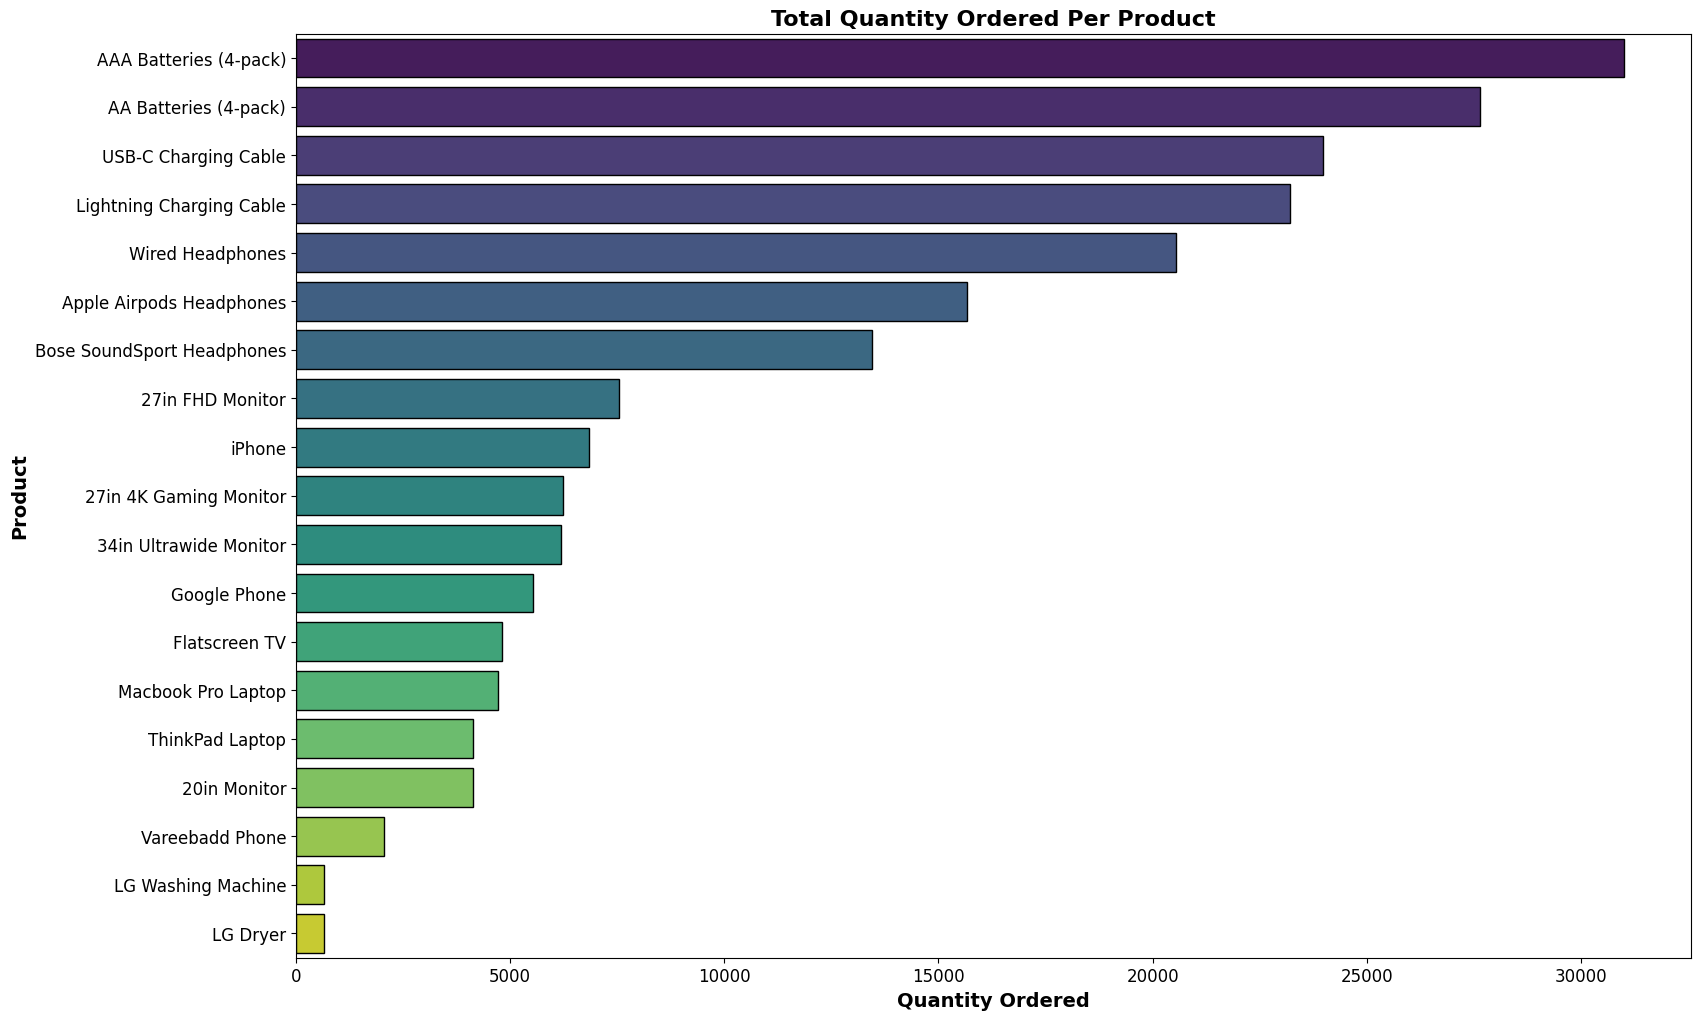

In [75]:
plt.figure(figsize=(18, 12))
sns.barplot(data=sorted_product_data, x="Quantity Ordered", y="Product",edgecolor="black", palette='viridis');
plt.xlabel("Quantity Ordered", fontsize=14,fontweight='bold')
plt.ylabel("Product", fontsize=14,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Total Quantity Ordered Per Product', fontsize=16, fontweight='bold')
plt.show();

### What Products Are Often Sold Together ?

In [146]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX),4,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA),4,22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4,9


In [171]:
duplicate_order_id = all_data[all_data["Order ID"].duplicated(keep=False)]

duplicate_order_id.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month,Hour
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,14
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA),4,19
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA),4,19
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston (MA),4,11
31,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston (MA),4,11
32,176586,AAA Batteries (4-pack),2,2.99,5.98,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",San Francisco (CA),4,17
33,176586,Google Phone,1,600.00,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",San Francisco (CA),4,17
119,176672,Lightning Charging Cable,1,14.95,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",New York City (NY),4,11
120,176672,USB-C Charging Cable,1,11.95,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",New York City (NY),4,11


In [172]:
duplicate_order_id["Grouped"]=duplicate_order_id.groupby("Order ID")["Product"].transform(lambda x : ','.join(x))

duplicate_order_id.head()




C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_21180\3958755724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_order_id["Grouped"]=duplicate_order_id.groupby("Order ID")["Product"].transform(lambda x : ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month,Hour,Grouped
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA),4,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA),4,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston (MA),4,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [174]:
duplicate_order_id= duplicate_order_id[[ "Order ID", "Grouped"]].drop_duplicates()

duplicate_order_id.head()


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
